In [8]:
import os

import rioxarray as rxr
import matplotlib.pyplot as plt

import crevopt

%matplotlib widget

## Load scene

In [5]:
output_dir = 'sample_data'

In [6]:
scene = rxr.open_rasterio(os.path.join(output_dir, '20180701_B08.tif')).squeeze()

Text(0.5, 1.0, '')

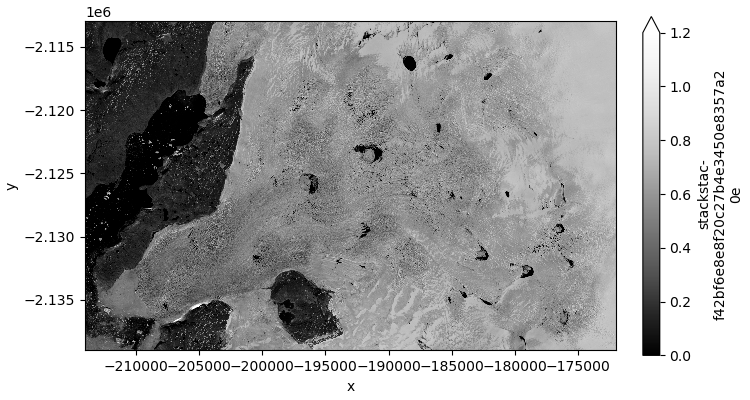

In [14]:
plt.close()
fig, ax = plt.subplots(layout='constrained', figsize=(7.5,4))
scene.plot(cmap='Greys_r', vmin=0, vmax=1.2)
ax.set_aspect('equal')
ax.set_title(None)

## Apply crevasse detection method

Reload crevopt (temporary, for development iteration)

In [284]:
from importlib import reload  # Python 3.4+
reload(crevopt)

<module 'crevopt' from '/Users/tom/Library/CloudStorage/OneDrive-DurhamUniversity/scripts/tools/crevopt/crevopt.py'>

In [16]:
scene_arr = scene.values.squeeze()

In [18]:

# defaults
lambd=10
sigma=4
gamma=0.1
mask_clip_thresh = 1.25

# recalculate in MVdW variables for referecne
print(f'Equivalent gab_size: {lambd}')
print(f'Equivalent gab_band: {sigma / lambd/ 0.5}')
print(f'Equivalent gab_ar: {gamma}')

# Apply detection script
mag_arr, dir_arr = crevopt.detect(
    scene_arr,
    lambd=lambd,
    sigma=sigma,
    gamma=gamma,
    mask=True,
    mask_clip_thresh=mask_clip_thresh,
)

# Hacky way to make the arrays back into a rioxarray
mag = scene * 0 + mag_arr
dir = scene * 0 + dir_arr


Equivalent gab_size: 10
Equivalent gab_band: 0.8
Equivalent gab_ar: 0.1


Text(0.5, 1.0, '')

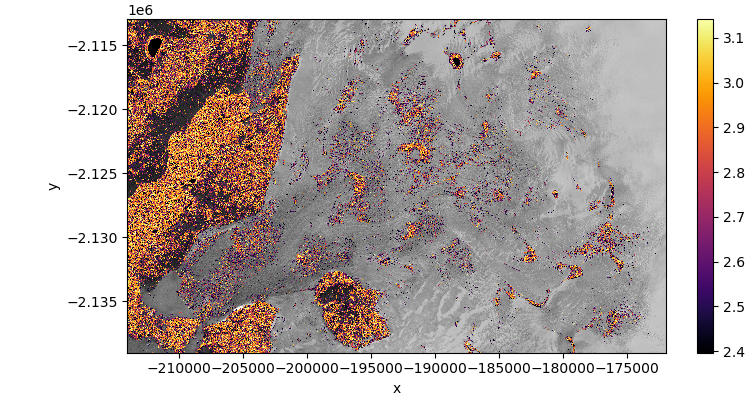

In [24]:
plt.close()
fig, ax = plt.subplots(layout='constrained', figsize=(7.5,4), sharex=True, sharey=True)

scene.plot(cmap='Greys_r', vmin=0, vmax=1.2, ax=ax, add_colorbar=False)

# Show magnitude
mag.plot(cmap='inferno', ax=ax)

# Show direction
# dir.plot(cmap='twilight', ax=ax)

ax.set_aspect('equal')
ax.set_title(None)